In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/listings.csv")

<ipython-input-45-092853aa0dd0>:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/gdrive/My Drive/listings.csv")


In [ ]:
len(list(data.columns))
len(data)

39881

In [ ]:
data['price'].head(15)

0     $299.00
1     $175.00
2      $60.00
3     $425.00
4     $275.00
5      $60.00
6     $308.00
7      $68.00
8      $55.00
9     $529.00
10    $372.00
11     $75.00
12     $75.00
13    $118.00
14    $123.00
Name: price, dtype: object

In [ ]:
data['amenities'].value_counts()

["Long term stays allowed"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         141
["Hair dryer", "First aid kit", "Essentials", "Iron", "Elevator", "Heating", "Shampoo", "Smoke alarm", "TV", "Fire extinguisher", "Hangers", "Ai

In [ ]:
list(data.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [ ]:
data = data[['description', 'neighborhood_overview','latitude','longitude','amenities','price','neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'reviews_per_month',
 'host_has_profile_pic', 'description','host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate']]

In [ ]:
data['description'].head(10)

,description,description
0,Renovated apt home in elevator building.<br />...,Renovated apt home in elevator building.<br />...
1,"Beautiful, spacious skylit studio in the heart...","Beautiful, spacious skylit studio in the heart..."
2,One room available for rent in a 2 bedroom apt...,One room available for rent in a 2 bedroom apt...
3,"<b>The space</b><br />Beautiful, fully furnish...","<b>The space</b><br />Beautiful, fully furnish..."
4,We welcome you to stay in our lovely 2 br dupl...,We welcome you to stay in our lovely 2 br dupl...
5,Single bedroom available in 3 bedroom apartmen...,Single bedroom available in 3 bedroom apartmen...
6,<b>The space</b><br />Charming standard queen ...,<b>The space</b><br />Charming standard queen ...
7,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...
8,This room is up three flights of stairs - it's...,This room is up three flights of stairs - it's...
9,This Duplex Loft Suite with a Terrace offers a...,This Duplex Loft Suite with a Terrace offers a...


In [ ]:
len(list(data.columns))

34

In [ ]:
len(data)

39881

Clearing all other columns except the ones required in the data object.

In [ ]:
data.isnull().sum()

description                         845
neighborhood_overview             16415
latitude                              0
longitude                             0
amenities                             0
price                                 0
neighbourhood                     16414
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
has_availability                      0
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0
number_of_reviews                     0
review_scores_rating               8362
review_scores_accuracy             8825
review_scores_cleanliness          8815
review_scores_checkin              8829
review_scores_communication        8820
review_scores_location             8832
review_scores_value                8832
instant_bookable                      0
calculated_host_listings_count        0
reviews_per_month                  8362


In [ ]:
data.dtypes

description                        object
neighborhood_overview              object
latitude                          float64
longitude                         float64
amenities                          object
price                              object
neighbourhood                      object
neighbourhood_cleansed             object
neighbourhood_group_cleansed       object
has_availability                   object
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                   int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
instant_bookable                   object
calculated_host_listings_count    

In [ ]:
data = data.loc[:,~data.columns.duplicated()].copy()

In [ ]:
data['price'] = data['price'].str.replace("$","")
data['price'] = data['price'].str.replace(",","")
data['price'] = pd.to_numeric(data['price'])

<ipython-input-15-ad1142522408>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace("$","")


In [ ]:
data['price'].value_counts()

150.0     1164
100.0      991
200.0      877
75.0       730
80.0       712
          ... 
491.0        1
1446.0       1
1229.0       1
739.0        1
1871.0       1
Name: price, Length: 1049, dtype: int64

In [ ]:
data.drop(['neighbourhood'], axis = 1, inplace = True)

In [ ]:
data.drop(['neighborhood_overview'], axis = 1, inplace = True)

In [ ]:
data.drop(['host_about'], axis = 1, inplace = True)

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

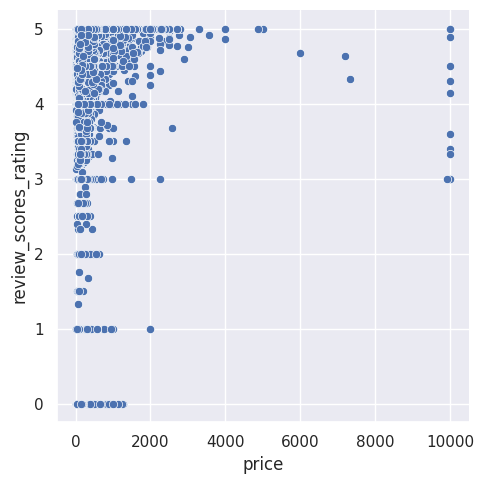

In [ ]:
sns.relplot(data=data, x="price", y="review_scores_rating")

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
amenitiesDF = data[['amenities','price',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(2000)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data= nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

<BarContainer object of 10 artists>

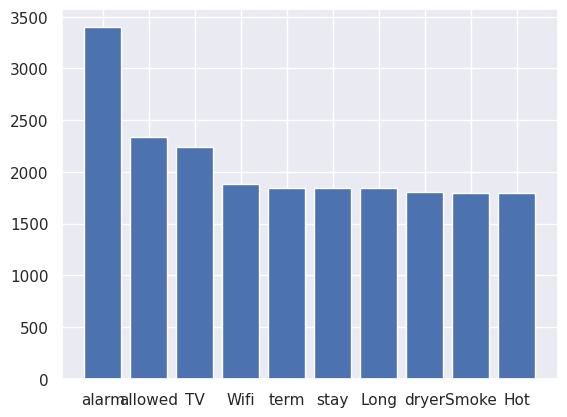

In [ ]:
import matplotlib.pyplot as plt
x = []
y = []
for i in allemenities_data:
  if(i not in x):
    x.append(i)
    y.append(allemenities_data.count(i))

new_y, new_x = zip(*sorted(zip(y,x),reverse=True))
plt.bar(new_x[:10],new_y[:10])

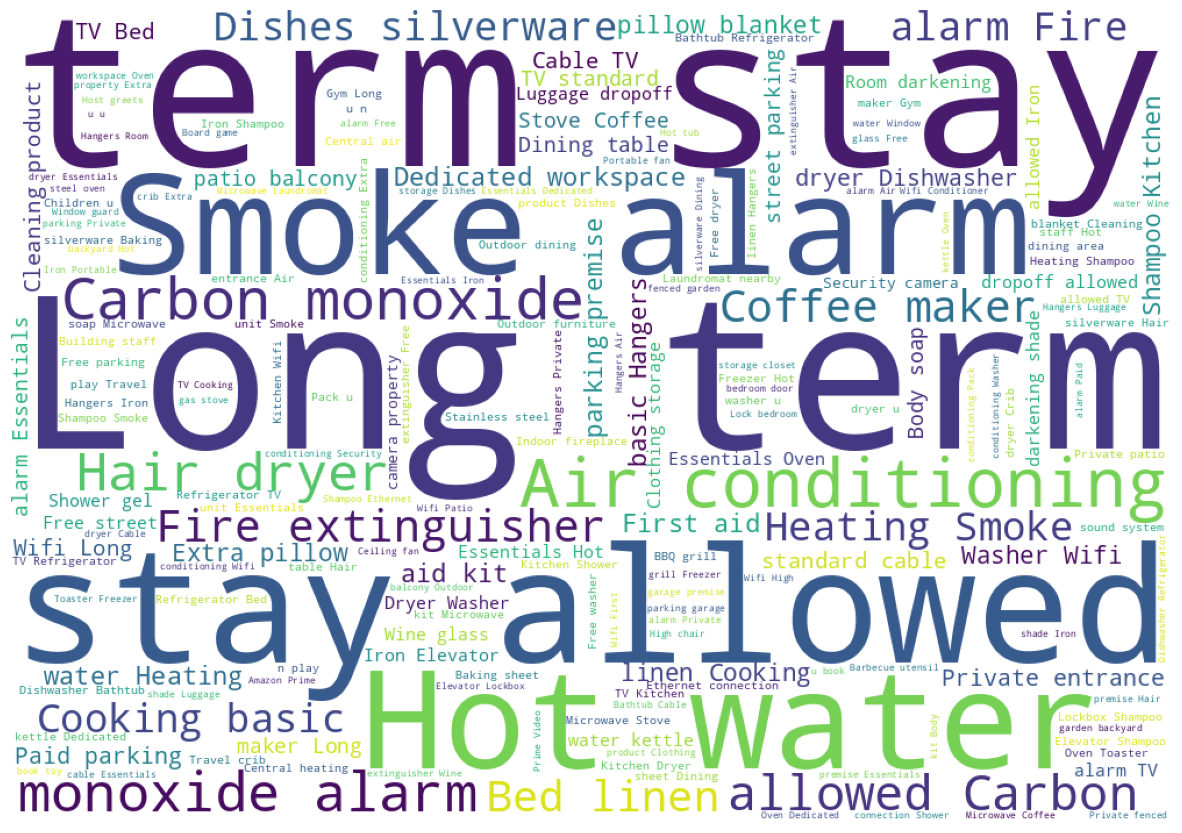

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
data['amenities'].head(30)

0     ["First aid kit", "Microwave", "Stove", "Coffe...
1     ["Stove", "Coffee maker", "Long term stays all...
2     ["Heating", "Kitchen", "Air conditioning", "Wi...
3     ["Hair dryer", "Essentials", "Carbon monoxide ...
4     ["Hair dryer", "Cable TV", "Refrigerator", "BB...
5     ["First aid kit", "Essentials", "Breakfast", "...
6     ["First aid kit", "Coffee maker", "Gym", "Long...
7     ["Body soap", "Microwave", "Laundromat nearby"...
8     ["Essentials", "Oven", "Cable TV", "Refrigerat...
9     ["Coffee maker", "Gym", "Long term stays allow...
10    ["First aid kit", "Coffee maker", "Gym", "Long...
11    ["Breakfast", "Cable TV", "Elevator", "Heating...
12    ["Hair dryer", "Essentials", "Breakfast", "Ele...
13    ["First aid kit", "Body soap", "Microwave", "L...
14    ["First aid kit", "Fast wifi \u2013 456 Mbps",...
15    ["Microwave", "Stove", "Coffee maker", "Long t...
16    ["Cable TV", "Microwave", "Heating", "Free str...
17    ["Microwave", "Stove", "Coffee maker", "Lo

In [ ]:
amenities = np.array(data['amenities'].head(500).map(lambda amns: amns.replace('"',"").replace('{',"").replace('}',"").split(',')))
# Create an array of all unique amenities across all rows
all_amenities = np.unique(np.concatenate(amenities))[1:]

In [ ]:
def available_amenties(all_amenities, amenities):
    amenties_bool = np.empty((amenities.shape[0], all_amenities.shape[0]))
    for i, row in enumerate(amenities):
        amns = all_amenities.copy()
        for j, amn in enumerate(amns):
            if amn in amenities[i]:
                amenties_bool[i,j] = True
            else:
                amenties_bool[i,j] = False
    return amenties_bool

amenities = available_amenties(all_amenities, amenities)

In [ ]:
amenitiesDF = pd.concat([amenitiesDF, pd.DataFrame(data=amenities, columns=all_amenities)], axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from scipy import stats
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
# Create train and test sets
scl_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
data = data.select_dtypes(exclude=['O'])
data = data.dropna()
data = data.head(500)
X = scl_pipeline.fit_transform(data.drop(columns=['price']))
X_train, X_test, y_train, y_test = train_test_split(X, data['price'], test_size=0.2, random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = data.drop(columns='price').columns
features = sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
#Create list of all attributes and their coefficient for plotting purposes
attribute = []
coefficient = []
for feature in features:
    attribute.append(feature[1]) 
    coefficient.append(feature[0])

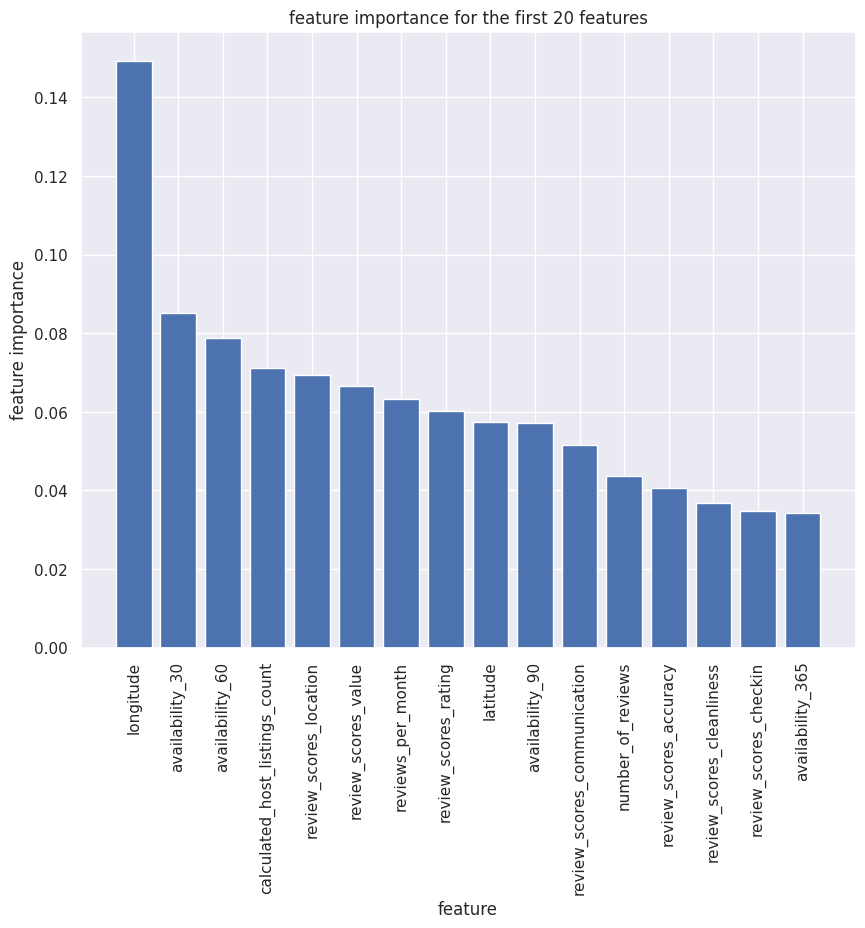

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(attribute[:20], height=coefficient[:20])
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('feature importance')
plt.title('feature importance for the first 20 features')
plt.show()

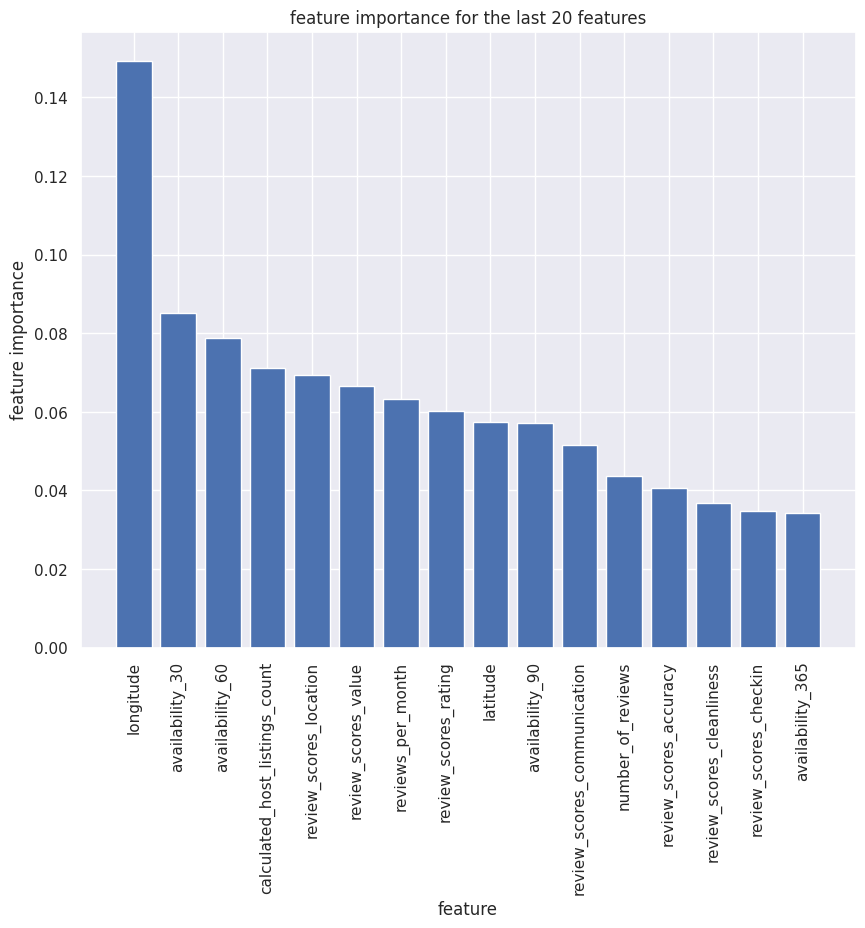

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(attribute[-20:], height=coefficient[-20:])
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('feature importance')
plt.title('feature importance for the last 20 features')
plt.show()

In [ ]:
from nltk.corpus import stopwords
import string
import nltk
from bs4 import BeautifulSoup

words=''
for i in range(len(data.head(100))):
    words += str(data.loc[i,data.columns.get_loc("description")].values[0])


words = str(BeautifulSoup(words, features="html.parser"))

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:10]

'renovated '

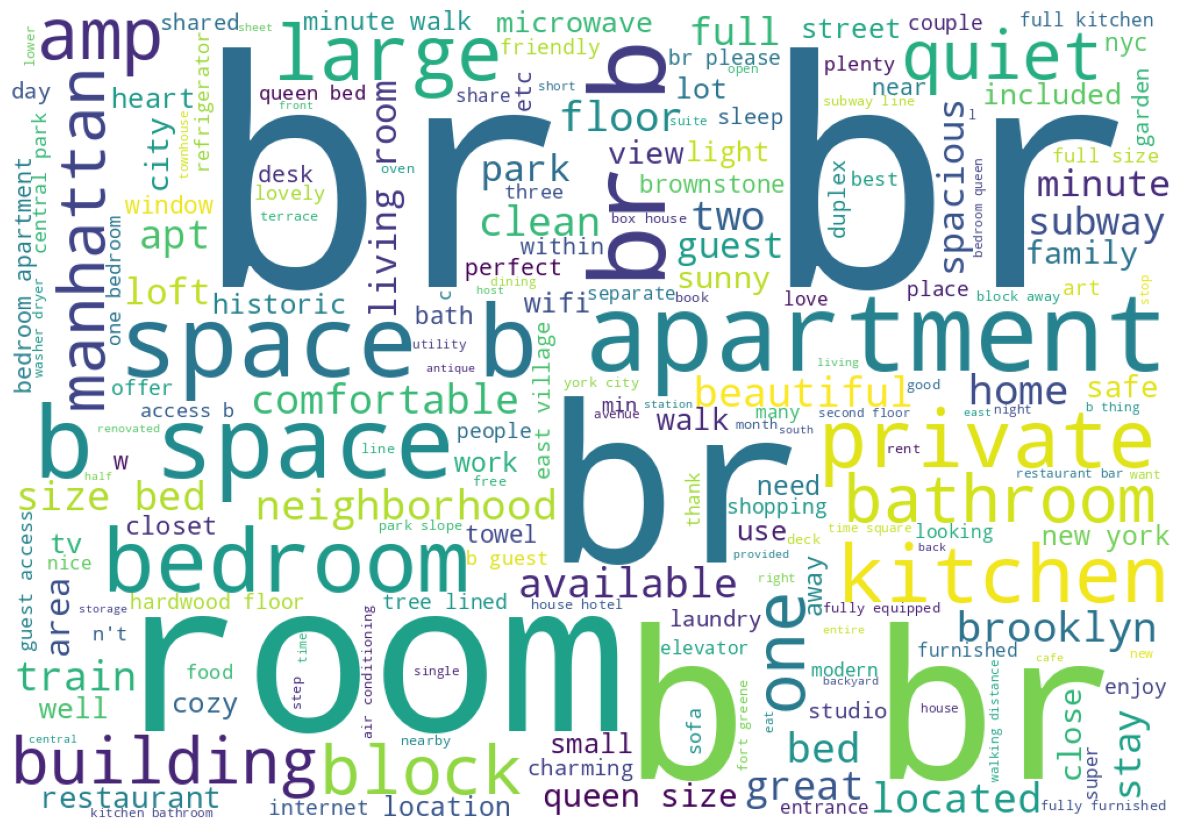

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

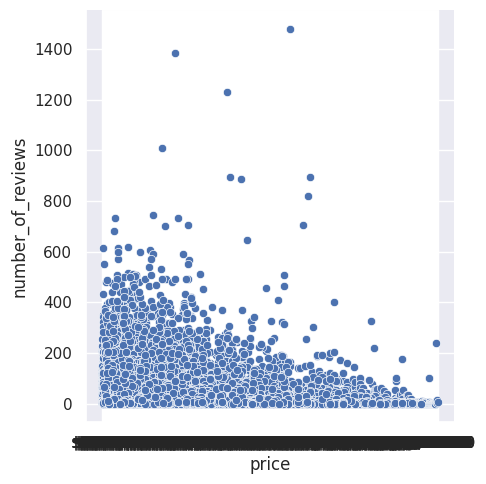

In [ ]:
sns.relplot(data=data, x="price", y="number_of_reviews")

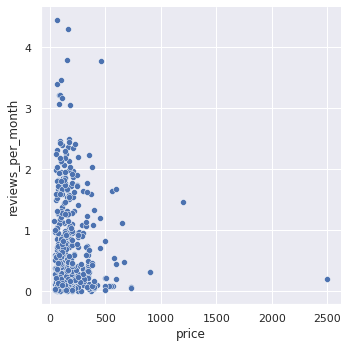

In [ ]:
sns.relplot(data=data, x="price", y="reviews_per_month")

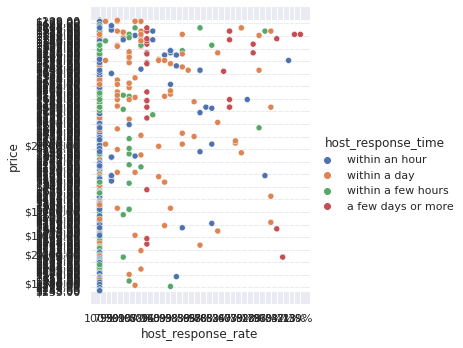

In [ ]:
sns.relplot(data=data.head(1000), y="price", hue="host_response_time", x="host_response_rate")


In [ ]:
data_new = data
data_new['description'].head(10)

,description,description
0,Renovated apt home in elevator building.<br />...,Renovated apt home in elevator building.<br />...
1,"Beautiful, spacious skylit studio in the heart...","Beautiful, spacious skylit studio in the heart..."
2,One room available for rent in a 2 bedroom apt...,One room available for rent in a 2 bedroom apt...
3,"<b>The space</b><br />Beautiful, fully furnish...","<b>The space</b><br />Beautiful, fully furnish..."
4,We welcome you to stay in our lovely 2 br dupl...,We welcome you to stay in our lovely 2 br dupl...
5,Single bedroom available in 3 bedroom apartmen...,Single bedroom available in 3 bedroom apartmen...
6,<b>The space</b><br />Charming standard queen ...,<b>The space</b><br />Charming standard queen ...
7,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...
8,This room is up three flights of stairs - it's...,This room is up three flights of stairs - it's...
9,This Duplex Loft Suite with a Terrace offers a...,This Duplex Loft Suite with a Terrace offers a...


In [ ]:
data_new['description'] = data_new['description'].str.replace("/","")
data_new['description'] = data_new['description'].str.replace(">","")
data_new['description'] = data_new['description'].str.replace("<br","")
data_new['description'] = data_new['description'].str.replace("<b","")
data_new['description'] = data_new['description'].str.replace("#","")
data_new['description'] = data_new['description'].str.replace("@","")
data_new['description'] = data_new['description'].str.replace(".  ",". ")
data_new['description'] = data_new['description'].str.replace(".","")
data_new['description'] = data_new['description'].str.replace(",","")
data_new['description'].head(10)

AttributeError: ignored

In [ ]:
#summary of descriptions of 1000 most expensive listings
summaryDF = data[['description','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['description'])]
summaryDF = summaryDF[summaryDF['description']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(1000)
top100DF.head()

<ipython-input-83-32109ff01f8b>:3: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  summaryDF = summaryDF[pd.notnull(summaryDF['description'])]


ValueError: ignored

In [ ]:
from nltk.corpus import stopwords
import string
import nltk

# Some data cleaning

words=''
for index,row in top100DF.iterrows():
    words += row['description']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

NameError: ignored

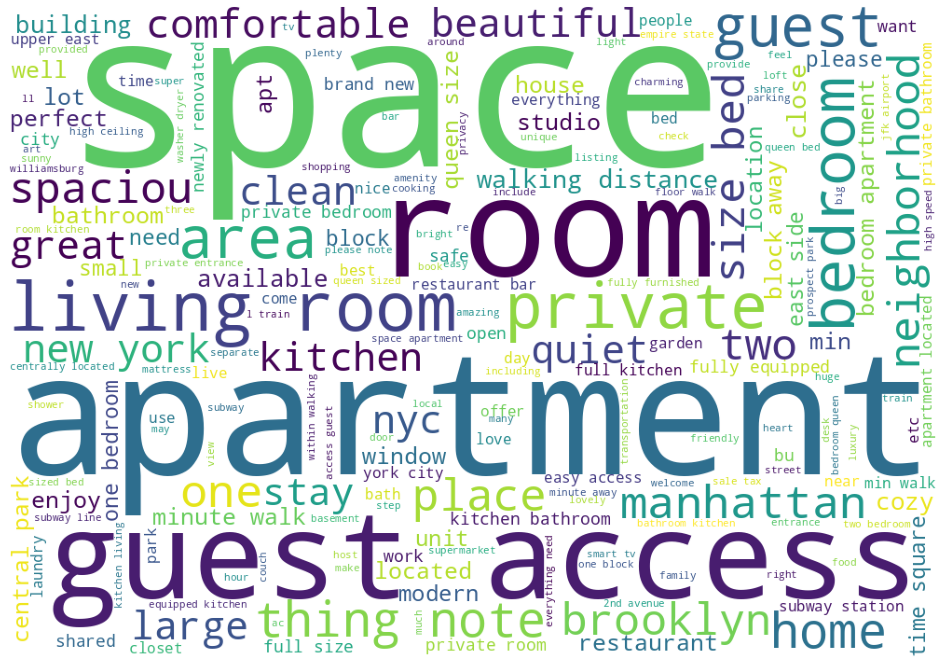

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Creating a dataframe of the summaries of the 100 most cheapest listings
summaryLowDF = data[['description','price']]
summaryLowDF = summaryLowDF[pd.notnull(summaryLowDF['description'])]
summaryLowDF = summaryLowDF[summaryLowDF['description']!=0]
summarLowyDF = summaryLowDF.sort_values('price',ascending=[1])
bot100DF = summaryLowDF.head(100)
bot100DF.sample(n=5)

,description,price
90,The space *NOTE RE: PASSAGE OF NY RESTRICTIONS...,$209.00
24,Beautiful peaceful healthy hom The space Home ...,$62.00
17,Comfortable studio apartment with super comfor...,$84.00
91,A cozy two-bedroom apartment with its own outd...,$300.00
61,Romantic quiet room in a beautiful 1800 Libert...,$84.00


In [ ]:
# Some data cleaning

words=''
for index,row in bot100DF.iterrows():
    words += row['description']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
print(final_words)

'renovated apt home elevator building space spaciou'

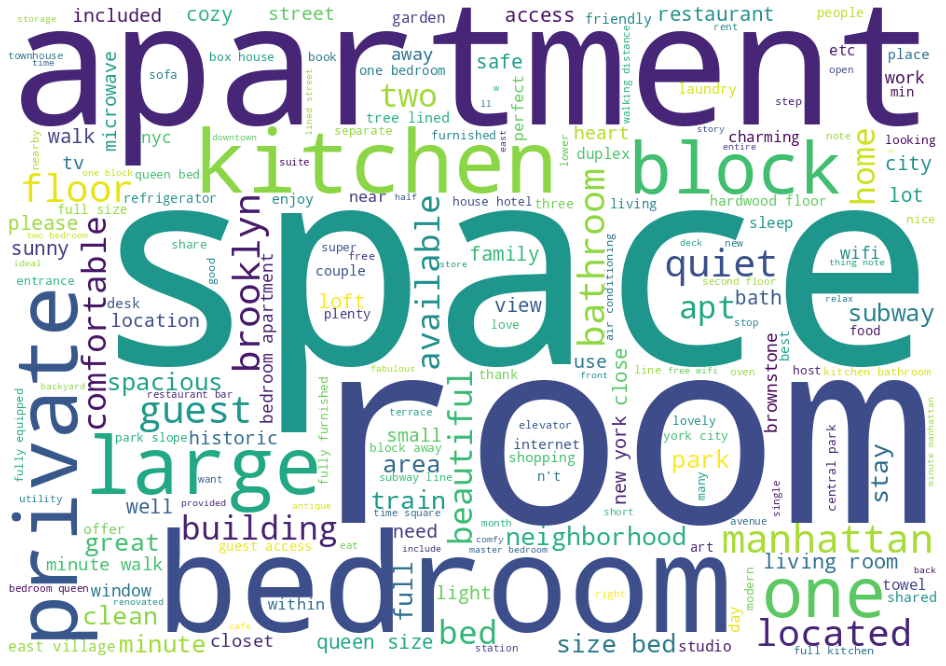

In [ ]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Description Normalization & Tokenization**

In [ ]:
import re
from datetime import datetime
from bs4 import BeautifulSoup
# Tokenizer function
def tokenizer(text):
    # Split text into tokens based on white space and punctuations
    #tokens = re.findall(r"[\w']+|[.,!?;‘’“”()]", text)

    soup = BeautifulSoup(text, features="html.parser")
    text = soup.get_text()

    #tokens = re.findall(r"(?:(?<=\b\w)\s(?=\w\b)|[\w#@]+|[^\w\s]|https?://\S+)", text)

    # text = re.sub(r'http\\:', 'URL_http\\:', text)
    # text = re.sub(r'www.', 'URL_www.', text)
    # text = re.sub(r'https\\:','URL_https\\:',text)
    # text = re.sub(r'@','USER_',text)
    # text = re.sub(r'#','HASHTAG_',text)
    
    #tokens = re.findall(r"[\w'#@]+|[.,!?;‘’“”()\"<>/]", text)
    tokens = re.findall(r"(?:(?<=\b\w)\s(?=\w\b)|[\w'#@]+|[^\w\s])|(?:\b\w(?:\.\s?\w)+\b)", text)

    #tokens = re.findall(pattern, text)
    
    # Normalize clitics and possessive apostrophes
    normalized_tokens = []
    for token in tokens:
        if token.endswith("'s"): # word-ending apostrophe is possessive
            normalized_tokens.append(token[:-2] + " 's")
        elif re.match(r"[\w]+'[\w]?[mrevsd]{1}\b", token): # clitic
            normalized_tokens.append(token[:-2] + " " + normalize_clitic(token[-2:]))
        else:
            normalized_tokens.append(token)
    
    # Normalize hashtags and user references
    normalized_tokens = [normalize_hashtag(token) if token.startswith("#") else token for token in normalized_tokens]
    normalized_tokens = [normalize_user_reference(token) if token.startswith("@") else token for token in normalized_tokens]
    
    # Normalize smileys
    normalized_tokens = [normalize_smiley(token) if is_smiley(token) else token for token in normalized_tokens]
    
    # Join words with spaces in between
    normalized_tokens = join_words(normalized_tokens)
    
    # Normalize dates and times
    normalized_tokens = [normalize_date(token) if is_date(token) else token for token in normalized_tokens]
    normalized_tokens = [normalize_time(token) if is_time(token) else token for token in normalized_tokens]
    
    # Normalize URLs
    normalized_tokens = [normalize_url(token) if is_url(token) else token for token in normalized_tokens]
    
    # Add final full stop if sentence ends with a word that legitimately has a full stop
    if normalized_tokens[-1] in ["Mr.", "Mrs.", "Dr.", "Ms.", "St.", "Ave.", "Rd.", "Blvd.", "Jr.", "Sr."]:
        normalized_tokens.append(".")
    
    return normalized_tokens

# Helper functions for clitic and smiley normalization
def normalize_clitic(clitic):
    clitic_dict = {"'m": "am", "'re": "are", "n't": "not", "'s": "is", "'ll": "will", "'d": "would", "'ve": "have", "'clock": "o'clock", "'em": "them"}
    return clitic_dict.get(clitic, clitic)


def is_smiley(token):
    smiley_regex = r"[\U0001F600-\U0001F64F]"
    return re.match(smiley_regex, token)

def normalize_smiley(smiley):
    return "SMILEY_" + smiley

# Helper functions for hashtag, user reference, and URL normalization
def normalize_hashtag(hashtag):
    return hashtag[1:]

def normalize_user_reference(user_reference):
    return "USER_" + user_reference[1:]

def is_url(token):
    url_regex = r"https?:\/\/[^\s]+"
    return re.match(url_regex, token)

def normalize_url(url):
    return "URL_" + url

# Helper functions for date and time normalization
def is_date(token):
    date_regex = r"\d{1,2}[/-]\d{1,2}[/-]\d{2,4}"
    return re.match(date_regex, token)

def normalize_date(date):
    try:
        datetime_object = datetime.strptime(date, '%m/%d/%Y')
    except ValueError:
        datetime_object = datetime.strptime(date, '%m/%d/%y')
    return "DATE_" + datetime.strftime(datetime_object, '%Y-%m-%d')

def is_time(token):
    time_regex = r"\d{1,2}:\d{2}([ap]m)?"
    return re.match(time_regex, token)

def normalize_time(time):
    try:
        datetime_object = datetime.strptime(time, '%I:%M%p')
    except ValueError:
        datetime_object = datetime.strptime(time, '%I:%M')
    return "TIME_" + datetime.strftime(datetime_object, '%H:%M')


# Helper function for joining words with spaces in between
def join_words(tokens):
    # Look for consecutive tokens with a single space in between
    joined_tokens = []
    i = 0
    while i < len(tokens):
        if i < len(tokens) - 2 and tokens[i+1] == " " and tokens[i+2].isalpha():
            joined_tokens.append(tokens[i] + tokens[i+1] + tokens[i+2])
            i += 3
        else:
            joined_tokens.append(tokens[i])
            i += 1
    return joined_tokens

# Helper functions

# Test the tokenizer
text = "I'm prathmesh and this is a test."


In [ ]:
import re
from datetime import datetime

def tokenizer_2(text):
  #text = convert_time_text(text)
  #text = convert_date_time_text(text)
  # Handle dates
  # text = re.sub(r"(\d{1,2})[-/th|st|nd|rd]*\s*(\w{3,})[-/th|st|nd|rd]*\s*(\d{2,4})", r" CF:D:\3-\2-\1 ", text, flags=re.IGNORECASE)
  # text = re.sub(r"(\d{4})[-/th|st|nd|rd]*\s*(\w{1,})[-/th|st|nd|rd]*", r" CF:D:\1-\2 ", text, flags=re.IGNORECASE)
  # text = re.sub(r"(\w{3,})[-/th|st|nd|rd]*\s*(\d{2,4})", r" CF:D:\2-\1 ", text, flags=re.IGNORECASE)
  # text = re.sub(r"(\d{1,2})[-/th|st|nd|rd]*\s*(\d{1,2})[-/th|st|nd|rd]*\s*(\d{2,4})", r" CF:D:\3-\2-\1 ", text)
  # text = re.sub(r"(\d{1,2})[-/th|st|nd|rd]*\s*(\w{3,})", r" CF:D:????-\2-\1 ", text, flags=re.IGNORECASE)
  # text = re.sub(r"(\w{3,})[-/th|st|nd|rd]*", r" CF:D:????-\1 ", text, flags=re.IGNORECASE)
  
  # Handle times
  text = re.sub(r"(\d{1,2})\s*(?:AM|PM|am|pm)", r" CF:T:\g<1>00 ", text)
  text = re.sub(r"(\d{1,2})\s*:\s*(\d{2})\s*(?:AM|PM|am|pm)*", r" CF:T:\1:\2 ", text)

  # Handling time formats like 5 o'clock or 5.30 or 5:30 etc.
  text = re.sub(r"(\d{1,2})[.:]?(\d{0,2})\s*o['’ ]?clock", r" CF:T:\1\2 ", text)
  #Handling time with timezone abbreviations
  timezone_abbreviations = {"PST": "-0800", "PDT": "-0700", "EST": "-0500", "EDT": "-0400", "IST": "+0530"}
  for abbreviation, offset in timezone_abbreviations.items():
      text = re.sub(fr"{abbreviation}\s*(\d{{1,2}})(?::(\d{{2}}))?", fr" CF:T:\1\2{offset}", text)
  #Handling URLs as a single token
  text = re.sub(r"(http|https)://\S+", " URL ", text)
  #Adding final full stop if the sentence ends with a word that legitimately has a full stop
  text = re.sub(r"(?<=\w)\.(?=\s*$)", r".", text) 
  #Splitting the text into tokens based on whitespace
  tokens = text.split()

  normalized_tokens = []

  for token in tokens:
      if token.endswith("'s"): # word-ending apostrophe is possessive
          normalized_tokens.append(token[:-2] + " 's")
      elif re.match(r"[\w]+'[\w]?[mrevsd]{1}\b", token): # clitic
          normalized_tokens.append(token[:-2] + " " + normalize_clitic(token[-2:]))
      else:
          normalized_tokens.append(token)
  
  # # Normalize hashtags and user references
  # normalized_tokens = [normalize_hashtag(token) if token.startswith("#") else token for token in normalized_tokens]
  for token in normalized_tokens:
    if token.startswith("#"):
      normalized_tokens.insert(normalized_tokens.index(token),"#")
      normalized_tokens[normalized_tokens.index(token)] = token[1:]
    if token.startswith("@"):
      normalized_tokens.insert(normalized_tokens.index(token),"@")
      normalized_tokens[normalized_tokens.index(token)] = token[1:]
    if is_smiley(token):
      normalized_tokens.insert(normalized_tokens.index(token),token[0])
      normalized_tokens[normalized_tokens.index(token)] = token[1:]
 
    
  return normalized_tokens
  

In [ ]:
pip install datefinder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re

def tokenizer_normalizer(text):
    
    # Handle clitics first
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'s", " 's", text)
    text = re.sub(r"s'", "s 's", text)
    
    # Separate punctuations
    text = re.sub(r"([^\w\s])", r" \1 ", text)
    
    # Handle possessive apostrophes
    text = re.sub(r"'", r" ' ", text)
    text = re.sub(r"s ' s", "'s", text)
    
    # Separate words with spaces
    text = re.sub(r"\s+", "", text)
    
    # Handle hashtags and user references
    text = re.sub(r"#(\w+)", r" #\1 ", text)
    text = re.sub(r"@(\w+)", r" @\1 ", text)
    
    # Handle smileys
    text = re.sub(r"(:\)|:-\)|:\(|:-\()", r" \1 ", text)
    
    # Handle dates
    text = re.sub(r"(\d{1,2})[-/th|st|nd|rd]*\s*(\w{3,})[-/th|st|nd|rd]*\s*(\d{2,4})", r" CF:D:\3-\2-\1 ", text, flags=re.IGNORECASE)
    text = re.sub(r"(\d{4})[-/th|st|nd|rd]*\s*(\w{1,})[-/th|st|nd|rd]*", r" CF:D:\1-\2 ", text, flags=re.IGNORECASE)
    text = re.sub(r"(\w{3,})[-/th|st|nd|rd]*\s*(\d{2,4})", r" CF:D:\2-\1 ", text, flags=re.IGNORECASE)
    text = re.sub(r"(\d{1,2})[-/th|st|nd|rd]*\s*(\d{1,2})[-/th|st|nd|rd]*\s*(\d{2,4})", r" CF:D:\3-\2-\1 ", text)
    text = re.sub(r"(\d{1,2})[-/th|st|nd|rd]*\s*(\w{3,})", r" CF:D:????-\2-\1 ", text, flags=re.IGNORECASE)
    text = re.sub(r"(\w{3,})[-/th|st|nd|rd]*", r" CF:D:????-\1 ", text, flags=re.IGNORECASE)
    
    # Handle times
    text = re.sub(r"(\d{1,2})\s*(?:AM|PM|am|pm)", r" CF:T:\g<1>00 ", text)
    text = re.sub(r"(\d{1,2})\s*:\s*(\d{2})\s*(?:AM|PM|am|pm)*", r" CF:T:\1:\2 ", text)
    # Handling time formats like 5 o'clock or 5.30 or 5:30 etc.
    text = re.sub(r"(\d{1,2})[.:]?(\d{0,2})\s*o['’ ]?clock", r" CF:T:\1\2 ", text)

# Handling time with timezone abbreviations
    timezone_abbreviations = {"PST": "-0800", "PDT": "-0700", "EST": "-0500", "EDT": "-0400", "IST": "+0530"}
    for abbreviation, offset in timezone_abbreviations.items():
        text = re.sub(fr"{abbreviation}\s*(\d{{1,2}})(?::(\d{{2}}))?", fr" CF:T:\1\2{offset}", text)

# Handling URLs as a single token
    text = re.sub(r"(http|https)://\S+", " URL ", text)

# Adding final full stop if the sentence ends with a word that legitimately has a full stop
    text = re.sub(r"(?<=\w)\.(?=\s*$)", r".", text)

# Splitting the text into tokens based on whitespace
    tokens = text.split()

    return tokens

In [ ]:
import re

def normalize(tokens):
    normalized_tokens = []
    for token in tokens:
        # Normalize clitics
        if token in clitic_dict.values():
            normalized_tokens.extend([clitic_dict[token]])
        elif token.endswith("'s"):
            normalized_tokens.extend([token[:-2], "'s"])
        else:
            # Normalize all other tokens
            normalized_token = token.lower()
            normalized_token = re.sub(punctuation, "", normalized_token)
            if normalized_token.startswith("cf:d:"):
                normalized_token = normalize_date(normalized_token)
            elif normalized_token.startswith("cf:t:"):
                normalized_token = normalize_time(normalized_token)
            normalized_tokens.extend([normalized_token])
    return normalized_tokens

def normalize_date(token):
    # Extract the year, month, and date components
    date_components = re.search(r"\d{4}|\?\?\?\?", token), re.search(r"\d{2}", token, re.MULTILINE), re.search(r"\d{2}", token, re.MULTILINE, re.UNICODE)
    year = date_components[0].group() if date_components[0] is not None else "????"
    month = date_components[1].group() if date_components[1] is not None else "??"
    day = date_components[2].group() if date_components[2] is not None else "??"
    return f"CF:D:{year}-{month.zfill(2)}-{day.zfill(2)}"

def normalize_time(token):
    # Extract the hour and minute components
    time_components = re.search(r"\d{1,2}|\?\?\?\?", token), re.search(r"\d{2}|\?\?\?", token, re.MULTILINE)
    hour = time_components[0].group() if time_components[0] is not None else "??"
    minute = time_components[1].group() if time_components[1] is not None else "00"
    timezone = re.search(r"[+\-]\d{4}", token)
    timezone_str = f"|{timezone.group(0)}" if timezone is not None else ""
    return f"CF:T:{hour.zfill(2)}{minute.zfill(2)}{timezone_str}"
